In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,recall_score,matthews_corrcoef,roc_curve,roc_auc_score,auc,precision_recall_curve
from sklearn.metrics import accuracy_score
import math
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import svm

LogisticRegression

testing_results

sn : mean : 0.7359756745501802 std : 0.01735847110678243

sp : mean : 0.7637858096756128 std : 0.010165352063887809

acc : mean : 0.7498817482862122 std : 0.011702299112193296

MCC : mean : 0.5000162755533857 std : 0.023327185676040835

AUC : mean : 0.8225809974516402 std : 0.010417805530360686



______________________________

independent_testing_results

sn : mean : 0.7377937649880095 std : 0.003926121628922353

sp : mean : 0.7756834532374101 std : 0.0049101561234632845

acc : mean : 0.7567386091127098 std : 0.002234723790354293

MCC : mean : 0.5138617866092943 std : 0.0045129211265636585

AUC : mean : 0.8358466147944954 std : 0.0006567491983775718



______________________________

GaussianNB

testing_results

sn : mean : 0.6342278033860336 std : 0.019823731080577646

sp : mean : 0.7756498513763839 std : 0.017215074056070038

acc : mean : 0.7049394516741311 std : 0.016495053984246725

MCC : mean : 0.41409435661188426 std : 0.03321839871350432

A

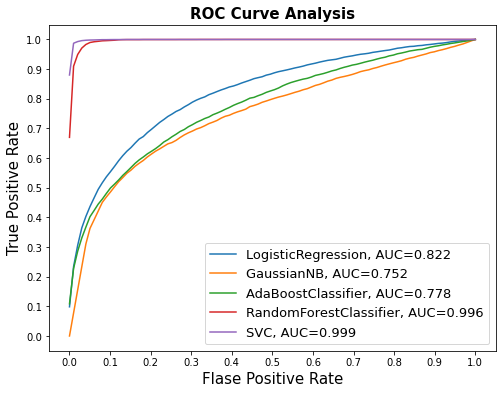

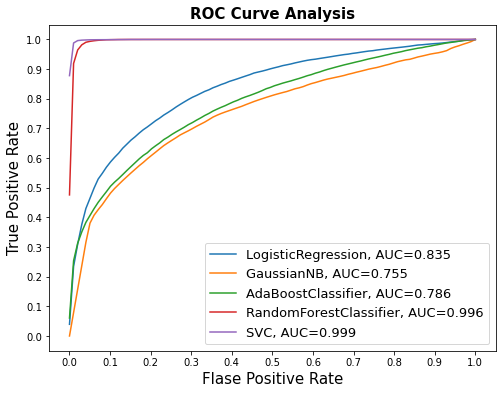

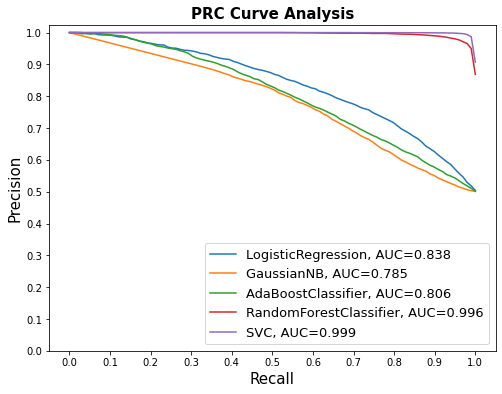

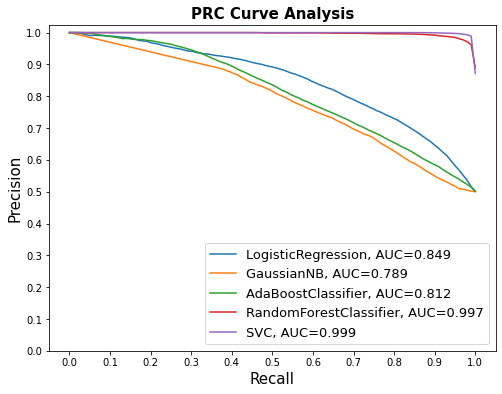

In [2]:
def plot_Roc(result_table,x):
    fig = plt.figure(figsize=(8,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(result_table.loc[i]['classifiers'], result_table.loc[i]['auc']))
  
    if x == 0:
        plt.xticks(np.arange(0.0, 1.1, step=0.1))
        plt.xlabel("Flase Positive Rate", fontsize=15)

        plt.yticks(np.arange(0.0, 1.1, step=0.1))
        plt.ylabel("True Positive Rate", fontsize=15)
        plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
        plt.legend(prop={'size':13}, loc='lower right')
        
    if x == 1:
        plt.xticks(np.arange(0.0, 1.1, step=0.1))
        plt.xlabel("Flase Positive Rate", fontsize=15)

        plt.yticks(np.arange(0.0, 1.1, step=0.1))
        plt.ylabel("True Positive Rate", fontsize=15)
        
        plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
        plt.legend(prop={'size':13}, loc='lower right')
        
    if x == 2:
        plt.xticks(np.arange(0.0, 1.1, step=0.1))
        plt.xlabel("Recall", fontsize=15)

        plt.yticks(np.arange(0.0, 1.1, step=0.1))
        plt.ylabel("Precision", fontsize=15)
        
        plt.title('PRC Curve Analysis', fontweight='bold', fontsize=15)
        plt.legend(prop={'size':13}, loc='lower right')
        
    if x == 3:
        plt.xticks(np.arange(0.0, 1.1, step=0.1))
        plt.xlabel("Recall", fontsize=15)

        plt.yticks(np.arange(0.0, 1.1, step=0.1))
        plt.ylabel("Precision", fontsize=15)
        
        plt.title('PRC Curve Analysis', fontweight='bold', fontsize=15)
        plt.legend(prop={'size':13}, loc='lower right')
        
        
    plt.show()

    
def analyze(All_Classifiers):
    
    val_ROC_result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
    test_ROC_result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
    val_PRC_result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
    test_PRC_result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
    for temp in All_Classifiers:
        testing_result,independent_testing_result = temp
        index = 0
        cls_name = testing_result[0]
        
        print(cls_name['cls_name'] +'\n')
        

        for x in [testing_result, independent_testing_result]:


            title = ''

            if index == 0:
                title = 'testing_'
            if index == 1:
                title = 'independent_testing_'

            index += 1
            

            print(title +  'results\n')

            for j in ['sn', 'sp', 'acc', 'MCC','AUC']:

                total = []

                for val in x:
                    total.append(val[j])
                
                print(j + ' : mean : ' + str(np.mean(total)) + ' std : ' + str(np.std(total))  + '\n')



            print('\n\n______________________________\n')
                
        index = 0
        
        
        for x in [testing_result,independent_testing_result]:
            tprs = []
            aucs = []
            mean_fpr = np.linspace(0, 1, 100)

            i = 0

            for val in x:
                tpr = val['tpr']
                fpr = val['fpr']
                tprs.append(np.interp(mean_fpr, fpr, tpr))
 
                roc_auc = auc(fpr, tpr)
                aucs.append(roc_auc)
                plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.3f)' % (i+1, roc_auc))

                i += 1

       

            mean_tpr = np.mean(tprs, axis=0)
            mean_tpr[-1] = 1.0
            mean_auc = auc(mean_fpr, mean_tpr)
            std_auc = np.std(aucs)
            

            
            plt.plot(mean_fpr, mean_tpr, color='b',
                     label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
                     lw=2, alpha=.8)

            std_tpr = np.std(tprs, axis=0)
            tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
            tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
            plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                             label=r'$\pm$ 1 std. dev.')
            if index==0:
                val_ROC_result_table = val_ROC_result_table.append({'classifiers':cls_name['cls_name'],
                                        'fpr':mean_fpr, 
                                        'tpr':mean_tpr, 
                                        'auc':mean_auc}, ignore_index=True)
            if index==1:
                test_ROC_result_table = test_ROC_result_table.append({'classifiers':cls_name['cls_name'],
                                        'fpr':mean_fpr, 
                                        'tpr':mean_tpr, 
                                        'auc':mean_auc}, ignore_index=True)
            
        
            plt.xlim([-0.05, 1.05])
            plt.ylim([-0.05, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic curve')
            plt.legend(loc="lower right")

            title = ''

            if index == 0:
                title = '_testing_'
            if index == 1:
                title = '_independent_testing_'


            plt.close('all')

           #************************** Precision Recall Curve*********************************
            i = 0
            prs = []
            pre_aucs = []
            mean_recal= np.linspace(0, 1, 100)
            for val in x:
                pre = val['prec']
                rec = val['reca']
                prs.append(np.interp(mean_recal, rec, pre))
 
                p_r_auc = auc(rec, pre)
                pre_aucs.append(p_r_auc)
                plt.plot(rec, pre, lw=1, alpha=0.3,label='PRC fold %d (AUC = %0.3f)' % (i+1, p_r_auc))

                i += 1



            mean_pre = np.mean(prs, axis=0)
    
            mean_auc = auc(mean_recal, mean_pre)
            std_auc = np.std(pre_aucs)
            plt.plot(mean_recal, mean_pre, color='b',
                     label=r'Mean PRC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
                     lw=2, alpha=.8)
            
            if index==0:
                val_PRC_result_table = val_PRC_result_table.append({'classifiers':cls_name['cls_name'],
                                        'fpr':mean_recal, 
                                        'tpr':mean_pre, 
                                        'auc':mean_auc}, ignore_index=True)
            if index==1:
                test_PRC_result_table = test_PRC_result_table.append({'classifiers':cls_name['cls_name'],
                                        'fpr':mean_recal, 
                                        'tpr':mean_pre, 
                                        'auc':mean_auc}, ignore_index=True)

            std_pre = np.std(prs, axis=0)
            pre_upper = np.minimum(mean_pre + std_pre, 1)
            pre_lower = np.maximum(mean_pre - std_pre, 0)
            plt.fill_between(mean_recal, pre_lower, pre_upper, color='grey', alpha=.2,
                             label=r'$\pm$ 1 std. dev.')

            plt.xlim([-0.05, 1.05])
            plt.ylim([-0.05, 1.05])
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision Recall curve')
            plt.legend(loc="lower right")

            title = ''

            if index == 0:
                title = 'testing'
            if index == 1:
                title = 'independent_testing_'


            plt.close('all');


            index += 1

    plot_Roc(val_ROC_result_table,0 )
    plot_Roc(test_ROC_result_table,1 )
    plot_Roc(val_PRC_result_table,2 )
    plot_Roc(test_PRC_result_table,3 )
def calculateScore(X, y, model):
    tn = 0
    fn = 0
    tp = 0
    fp = 0
    pred_y =  model.predict_proba(X)[::,1]
    name=model.__class__.__name__
    ROCArea = roc_auc_score(y, pred_y)
    fpr, tpr, thresholds = roc_curve(y, pred_y)
    lossValue = None;
    
    pre, rec, threshlds = precision_recall_curve(y, pred_y)
    pre = np.fliplr([pre])[0]  
    rec = np.fliplr([rec])[0]  
    AUC_prec_rec = np.trapz(rec,pre)
    AUC_prec_rec = abs(AUC_prec_rec)
    
    pred_y[pred_y > 0.5] = 1
    pred_y[~(pred_y > 0.5)] = 0
    
    label = np.column_stack((y, pred_y))
    for i in range(len(label)):
        if label[i][0] == 0:
            if label[i][1] == 0:
                tn = tn + 1
            else:
                fp = fp + 1
        else:
            if label[i][1] == 0:
                fn = fn + 1
            else:
                tp = tp + 1

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    MCC = ((tp * tn) - (fp * fn)) / math.sqrt((tp + fn) * (tp + fp) * (tn + fn) * (tn + fp))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1Score =  precision * recall * 2 / (precision + recall)


    
    return {'sn' : sensitivity, 'sp' : specificity, 'acc' : accuracy, 'MCC' : MCC, 'AUC' : ROCArea,'precision' : precision, 'F1' : F1Score, 'fpr' : fpr, 'tpr' : tpr, 'thresholds' : thresholds,'pre_recall_curve':AUC_prec_rec,'prec':pre,'reca':rec,'cls_name':name}


def shuffle_ab(X, y):
    index = [i for i in range(len(X))]
    random.shuffle(index)
    X = X[index]
    y = y[index]
    return X, y


All_Classifiers = []

classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(),
                AdaBoostClassifier(),
                RandomForestClassifier(random_state=1234,criterion = 'entropy', max_depth= 700, max_features = 'sqrt', min_samples_leaf= 1,
                                      n_estimators = 3600),
                 svm.SVC(probability=True,C= 10, gamma= 0.1, kernel='rbf'),

               ]
    
for cls in classifiers:
    testing_result = []
    independent_testing_result= []
    for i in range(10):
        x = str(i+1)
        
        train_data,train_label=np.load('folds/'+'x_train'+str(x)+'.npy'), np.load('folds/'+'y_train'+str(x)+'.npy')
        test_data,test_label=np.load('folds/'+'x_val'+str(x)+'.npy'), np.load('folds/'+'y_val'+str(x)+'.npy')
        ind_test_data,ind_test_label=np.load('folds/'+'bgh_test_svc.npy'), np.load('folds/'+'testy_bi.npy')

        bst_model = pickle.load(open('models/best_model_'+cls.__class__.__name__+str(i+1)+'.dat', "rb"))
        testing_result.append(calculateScore(test_data, test_label, bst_model))
        independent_testing_result.append(calculateScore(ind_test_data, ind_test_label, bst_model))
    temp_dict = (testing_result,independent_testing_result)
    All_Classifiers.append(temp_dict)
analyze(All_Classifiers)